<a href="https://colab.research.google.com/github/XuRui314/Kaggle-Practice/blob/main/Elo_Merchant_Category_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 

drive.mount('/content/gdrive/') 

Mounted at /content/gdrive/


# Download dataset

注意这个只跑一次，colab换成高RAM解压会快一点

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zhouxurui","key":"0d1f963ce2beda6f2a058e791afc117c"}'}

In [ ]:
!mkdir -p ~/.kaggle 

!cp kaggle.json ~/.kaggle/ 

!chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
%cd /content/gdrive/MyDrive/kaggle/Elo_Merchant_Category_Recommendation

/content/gdrive/MyDrive/kaggle/Elo_Merchant_Category_Recommendation


In [ ]:
!kaggle competitions download -c elo-merchant-category-recommendation

 98% 603M/615M [00:11<00:00, 63.4MB/s]
100% 615M/615M [00:11<00:00, 55.5MB/s]


In [ ]:
!unzip elo-merchant-category-recommendation.zip

Archive:  elo-merchant-category-recommendation.zip
  inflating: Data Dictionary.xlsx    
  inflating: Data_Dictionary.xlsx    
  inflating: historical_transactions.csv  
  inflating: merchants.csv           
  inflating: new_merchant_transactions.csv  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Elo Merchant Category Recommendation

In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/kaggle/Elo_Merchant_Category_Recommendation")
!ls

'Data Dictionary.xlsx'			    new_merchant_transactions.csv
 Data_Dictionary.xlsx			    sample_submission.csv
 elo-merchant-category-recommendation.zip   test.csv
 historical_transactions.csv		    train.csv
 merchants.csv


## 比赛简介
Imagine being hungry in an unfamiliar part of town and getting restaurant recommendations served up, based on your personal preferences, at just the right moment. The recommendation comes with an attached discount from your credit card provider for a local place around the corner!

Right now, Elo, one of the largest payment brands in Brazil, has built partnerships with merchants in order to offer promotions or discounts to cardholders. But do these promotions work for either the consumer or the merchant? Do customers enjoy their experience? Do merchants see repeat business? Personalization is key.

Elo has built machine learning models to understand the most important aspects and preferences in their customers’ lifecycle, from food to shopping. But so far none of them is specifically tailored for an individual or profile. This is where you come in.

In this competition, Kagglers will develop algorithms to identify and serve the most relevant opportunities to individuals, by uncovering signal in customer loyalty. Your input will improve customers’ lives and help Elo reduce unwanted campaigns, to create the right experience for customers.



> Note: All data is simulated and fictitious, and is not real customer data


### What files do I need?

You will need, at a minimum, the train.csv and test.csv files. These contain the card_ids that we'll be using for training and prediction.

The historical_transactions.csv and new_merchant_transactions.csv files contain information about each card's transactions. historical_transactions.csv contains up to 3 months' worth of transactions for every card at any of the provided merchant_ids. new_merchant_transactions.csv contains the transactions at new merchants (merchant_ids that this particular card_id has not yet visited) over a period of two months.

merchants.csv contains aggregate information for each merchant_id represented in the data set.

### What should I expect the data format to be?

The data is formatted as follows:

train.csv and test.csv contain card_ids and information about the card itself - the first month the card was active, etc. train.csv also contains the target.

historical_transactions.csv and new_merchant_transactions.csv are designed to be joined with train.csv, test.csv, and merchants.csv. They contain information about transactions for each card, as described above.

merchants can be joined with the transaction sets to provide additional merchant-level information.

### What am I predicting?

You are predicting a loyalty score for each card_id represented in test.csv and sample_submission.csv.

File descriptions
- train.csv - the training set
- test.csv - the test set
- sample_submission.csv - a sample submission file in the correct format - contains all card_ids you are expected to predict for.
- historical_transactions.csv - up to 3 months' worth of historical transactions for each card_id
- merchants.csv - additional information about all merchants / merchant_ids in the dataset.
- new_merchant_transactions.csv - two months' worth of data for each card_id containing ALL purchases that card_id made at merchant_ids that were not visited in the historical data.

### Data fields
Data field descriptions are provided in Data Dictionary.xlsx.



## 数据表简介

&emsp;&emsp;能够看到，本次赛题数据较多、数据量也相对较大，部分数据甚至无法直接通过普通Excel直接打开。接下来我们快速了解每个数据集的基本含义：

&emsp;&emsp;总的来说，上述7个数据文件大概可以分为三类，其一是基本信息类数据集，包括Data_Dictionary和sample_submission。其中Data_Dictionary数据集是所有数据的数据字典，即包括了所有数据各字段的含义，而sample_submission则是提交结果时的范例数据。

- Data Dictionary/Data_Dictionary：数据字典

&emsp;&emsp;所有其他数据表中每个字段的含义，相当于是其他各数据表的说明书。数据字典包含多个sheet，每个sheet对应一个数据表的字段和解释：

<center><img src="https://i.loli.net/2021/10/20/ilGc7hrAwMZNpS8.png" alt="image-20211020204816830" style="zoom:50%;" />

> 其他数据集字段有重复，因此未在数据字典中列出。

当然，我们可以通过如下方式直接使用pandas进行读取：

In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
# 第三行开始读取，读取train表
pd.read_excel('./Data_Dictionary.xlsx', header=2, sheet_name='train')

,Columns,Description
0,card_id,Unique card identifier
1,first_active_month,"'YYYY-MM', month of first purchase"
2,feature_1,Anonymized card categorical feature
3,feature_2,Anonymized card categorical feature
4,feature_3,Anonymized card categorical feature
5,target,Loyalty numerical score calculated 2 months af...


- sample_submission：正确提交结果范例

In [ ]:
# 读取数据文件
pd.read_csv('sample_submission.csv', header=0).head(5)

,card_id,target
0,C_ID_0ab67a22ab,0
1,C_ID_130fd0cbdd,0
2,C_ID_b709037bc5,0
3,C_ID_d27d835a9f,0
4,C_ID_2b5e3df5c2,0


In [ ]:
# 查看数据集基本信息
pd.read_csv('sample_submission.csv', header=0).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   card_id  123623 non-null  object
 1   target   123623 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


&emsp;&emsp;最终建模结果提交格式，也就是以“一个id”+“对应预测结果”的格式进行提交。据此我们也能发现，实际上我们是需要预测每个card_id的用户忠诚度评分。我们也可以在竞赛Kaggle主页上查看提交结果格式和评估指标：

<center><img src="https://i.loli.net/2021/10/20/tveFu12sbNcAfwH.png" alt="image-20211020211206067" style="zoom:35%;" />

RMSE的计算过程如下：

$$RMSE= \sqrt{\frac{1}{n}\sum^n_{i=1}(y_i-\hat y_i)^2}$$

&emsp;&emsp;然后就是完成比赛的必要数据，也就是train和test两个数据集。顾名思义，train数据集就是训练数据，test就是测试数据集，二者特征一致，极简情况下我们可以直接在train上训练模型，在test上进行预测。

&emsp;&emsp;最后一类则是补充数据集，也就是 'historical_transactions.csv'、'new_merchant_transactions.csv'和'merchants.csv',其中前两个数据集记录了训练集和测试集信用卡的消费记录，而最后一个数据集则是前两个数据集中商铺信息（某特征）的进一步解释。在实际建模过程中，纳入更多数据进行规律挖掘，则有可能达到更好的效果。

&emsp;&emsp;在接下来的数据探索中，我们将首先重点解读train和test数据集的相关信息，然后再进一步探索其他三个补充数据集。

## train和test解读与初步探索

### 1.train和test数据集解读

&emsp;&emsp;首先先进行数据读取。当然考虑到后续数据集规模较大，我们可以提前导入gc包以进行内存管理。在实际清理内存时，我们可以先使用del删除对象、再使用gc.collect()，以达到手动清理内存的目的。

In [ ]:
import gc

首先进行数据读取：

In [ ]:
train = pd.read_csv('./train.csv')
test =  pd.read_csv('./test.csv')

In [ ]:
# 查看数据集规模
(train.shape, test.shape)

((201917, 6), (123623, 5))

然后依次对其进行解读。

- train：训练数据集

&emsp;&emsp;训练数据基本情况如下：

In [ ]:
# 查看前5条数据
train.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [ ]:
# 查看数据集信息
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   target              201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


回顾数据字典中的train表，查看train数据集中各字段解释：

In [ ]:
pd.read_excel('Data_Dictionary.xlsx', header=2, sheet_name='train')

,Columns,Description
0,card_id,Unique card identifier
1,first_active_month,"'YYYY-MM', month of first purchase"
2,feature_1,Anonymized card categorical feature
3,feature_2,Anonymized card categorical feature
4,feature_3,Anonymized card categorical feature
5,target,Loyalty numerical score calculated 2 months af...


实际含义如下：

| 字段 | 解释 |
| ------ | ------ |
| card_id | 第一无二的信用卡标志 |
| first_active_month | 信用卡首次激活时间，按照类似2017-02排列 |
| feature_1/2/3 | 匿名特征（不带明显业务背景或人工合成的特征） |
| target | 标签，忠诚度评分 |

- test：测试数据集

In [ ]:
# 查看前5条数据，和submission一致
test.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_active_month  123622 non-null  object
 1   card_id             123623 non-null  object
 2   feature_1           123623 non-null  int64 
 3   feature_2           123623 non-null  int64 
 4   feature_3           123623 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


并且各字段的解释和train一致。实际比赛过程中，由于测试集的标签“不可知”，所以需要在训练集train上划分出验证集来进行模型泛化能力评估。

### 2.数据质量分析

&emsp;&emsp;接下来简单数据探索。在实际建模过程中，首先我们会先校验数据的正确性，并检验缺失值、异常值等情况。

- 数据正确性校验

&emsp;&emsp;所谓数据正确性，指的是数据本身是否符合基本逻辑，例如此处信用卡id作为建模分析对象独一无二的标识，我们需要验证其是否确实独一无二，并且训练集和测试集信用卡id无重复。

In [ ]:
# 检验训练集id无重复
train['card_id'].nunique() == train.shape[0]

True

In [ ]:
# 检验测试集id无重复
test['card_id'].nunique() == test.shape[0]

True

In [ ]:
# 检验训练集和测试集id都是唯一值
test['card_id'].nunique()+ train['card_id'].nunique()  == len(set(test['card_id'].values.tolist() + train['card_id'].values.tolist()))

True

- 检验数据缺失情况

&emsp;&emsp;接下来，进一步检验数据确实情况：

In [ ]:
# 按列求缺失值并汇总
train.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [ ]:
test.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

能够发现数据集基本无缺失值，测试集中的唯一一个缺失值我们可以通过多种方式来进行填补，整体来说一条缺失值并不会对整体建模造成太大影响。

- 异常值

&emsp;&emsp;接下来进行异常值检验。由于我们尚未对数据集特征进行预处理，因此我们先查看标签列的异常值情况。首先我们可以用describe()方法查看这一列的基本统计信息：

In [ ]:
statistics = train['target'].describe()
statistics

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

由于该列是连续变量，我们可以借助概率密度直方图进行分布的观察：

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

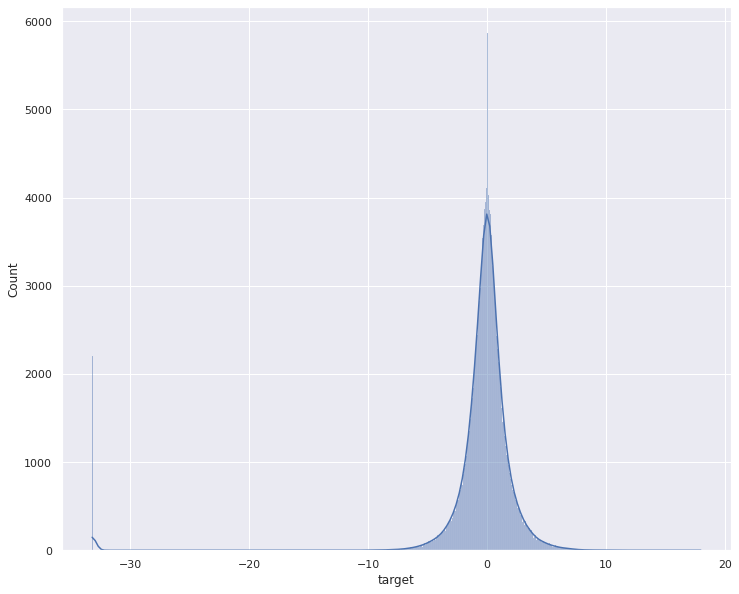

In [ ]:
sns.set(rc={'figure.figsize': (12, 10)})  # 设置画板大小

sns.histplot(train['target'] , kde=True)

能够发现，大部分用户忠诚度评分都集中在[-10,10]之间，并且基本符合正态分布，唯一需要注意的是有个别异常值取值在-30以下，该数据在后续分析中需要额外注意。我们可以简单查看有多少用户的标签数值是小于30的：

In [ ]:
(train['target'] < -30).sum()

2207

In [ ]:
( abs(train['target']) < 1).sum()

115158

约占整体20万数据的1%。

&emsp;&emsp;当然，对于连续变量，一般可以采用$3\delta$原则进行异常值识别，此处我们也可以简单计算下异常值范围：

In [ ]:
statistics.loc['mean'] - 3 * statistics.loc['std']

-11.945136285536291

即取值大于或小于11.94即可视作异常。

- 异常值分析

&emsp;&emsp;需要注意的是，此处我们是围绕标签进行的异常值检测，而本案例中标签并不是自然数值测量或统计的结果（如消费金额、身高体重等），而是通过某种公式人工计算得出（详见赛题分析）。出现如此离群点极有可能是某类特殊用户的标记。因此不宜进行异常值处理，而应该将其单独视作特殊的一类，在后续建模分析时候单独对此类用户进行特征提取与建模分析。

### 4.规律一致性分析

&emsp;&emsp;接下来，进行训练集和测试集的规律一致性分析。        
&emsp;&emsp;所谓规律一致性，指的是需要对训练集和测试集特征数据的分布进行简单比对，以“确定”两组数据是否诞生于同一个总体，即两组数据是否都遵循着背后总体的规律，即两组数据是否存在着规律一致性。      
&emsp;&emsp;我们知道，尽管机器学习并不强调样本-总体的概念，但在训练集上挖掘到的规律要在测试集上起到预测效果，就必须要求这两部分数据受到相同规律的影响。一般来说，对于标签未知的测试集，我们可以通过特征的分布规律来判断两组数据是否取自同一总体。

- 单变量分析

&emsp;&emsp;首先我们先进行简单的单变量分布规律的对比。由于数据集中四个变量都是离散型变量，因此其分布规律我们可以通过相对占比分布（某种意义上来说也就是概率分布）来进行比较。        
&emsp;&emsp;例如首先我们查看首次激活月份的相对占比分布可以通过如下代码实现：

In [ ]:
# 特征列名
features = ['first_active_month','feature_1','feature_2','feature_3']

# 训练集/测试集样本总数
train_count = train.shape[0]
test_count = test.shape[0]

In [ ]:
# 不同取值水平汇总后排序再除以样本总数
# value_counts是对不同值进行统计出现次数
train['first_active_month'].value_counts().sort_index()/train_count

2011-11    0.000040
2011-12    0.000010
2012-02    0.000035
2012-03    0.000050
2012-04    0.000089
             ...   
2017-10    0.067825
2017-11    0.064036
2017-12    0.050367
2018-01    0.000168
2018-02    0.000005
Name: first_active_month, Length: 75, dtype: float64

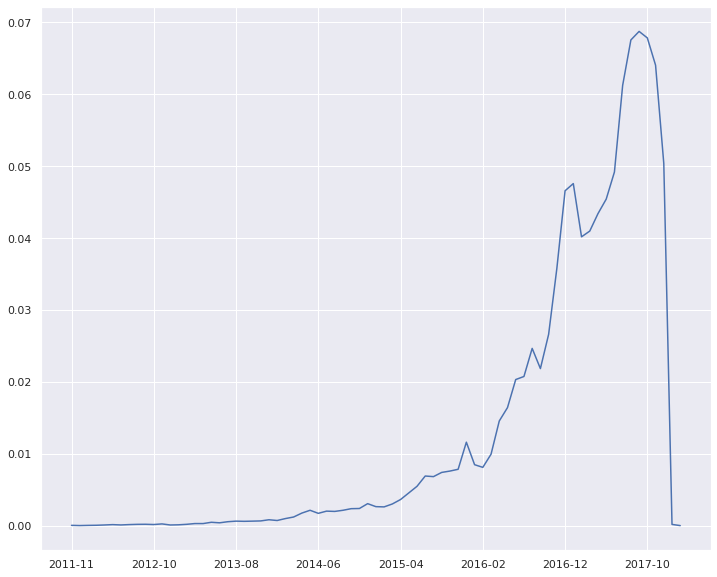

In [ ]:
# 分布图如下所示：
(train['first_active_month'].value_counts().sort_index()/train_count).plot()

当然，我们需要同时对比训练集和测试集的四个特征，可以通过如下代码实现：

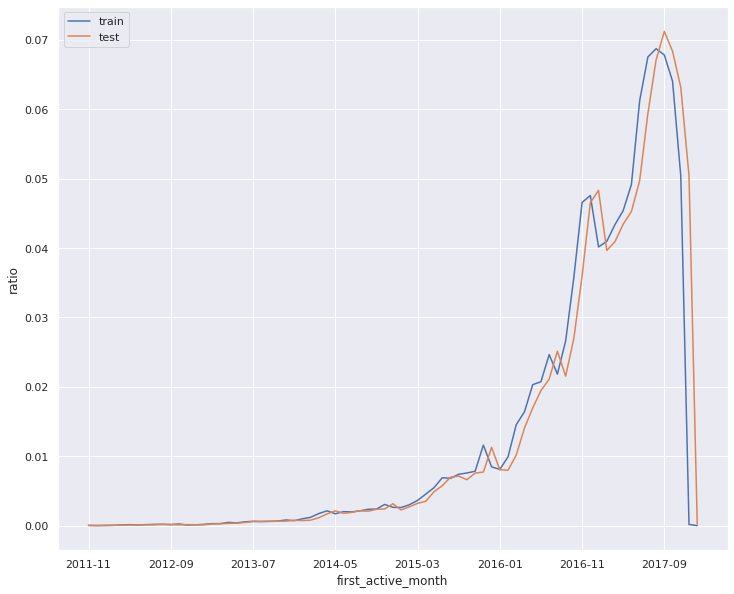

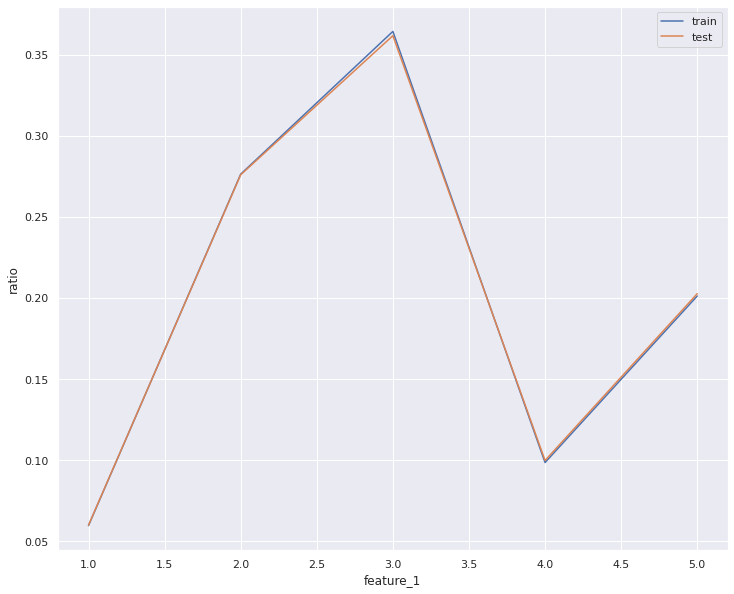

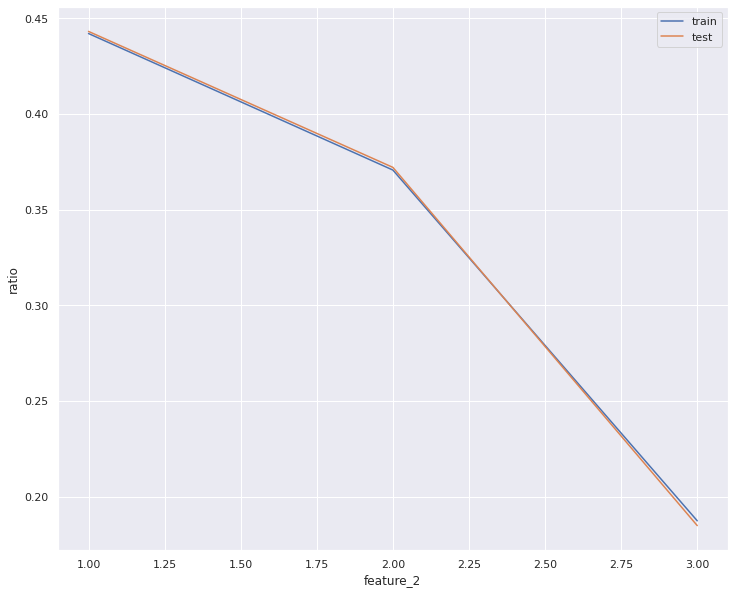

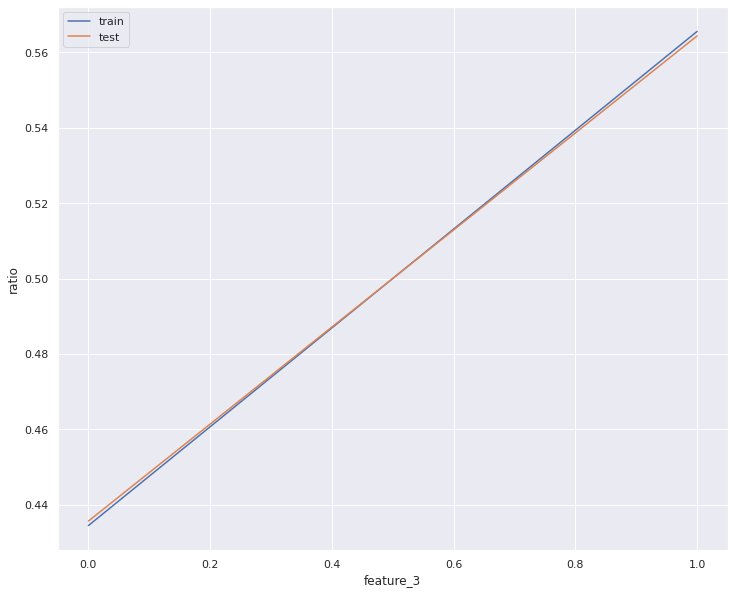

In [ ]:
for feature in features:
    (train[feature].value_counts().sort_index()/train_count).plot()
    (test[feature].value_counts().sort_index()/test_count).plot()
    plt.legend(['train','test'])
    plt.xlabel(feature)
    plt.ylabel('ratio')
    plt.show()

能够发现，两组数据的单变量分布基本一致。

- 多变量联合分布

&emsp;&emsp;接下来，我们进一步查看联合变量分布。所谓联合概率分布，指的是将离散变量两两组合，然后查看这个新变量的相对占比分布。例如特征1有0/1两个取值水平，特征2有A/B两个取值水平，则联合分布中就将存在0A、0B、1A、1B四种不同取值水平，然后进一步查看这四种不同取值水平出现的分布情况。        
&emsp;&emsp;首先我们可以创建如下函数以实现两个变量“联合”的目的：

In [ ]:
def combine_feature(df):
    cols = df.columns
    feature1 = df[cols[0]].astype(str).values.tolist()
    feature2 = df[cols[1]].astype(str).values.tolist()
    return pd.Series([feature1[i]+'&'+feature2[i] for i in range(df.shape[0])])

简单测试函数效果：

In [ ]:
# 选取两个特征
cols = [features[0], features[1]]
cols

['first_active_month', 'feature_1']

In [ ]:
# 查看合并后结果
train_com = combine_feature(train[cols])
train_com

0         2017-06&5
1         2017-01&4
2         2016-08&2
3         2017-09&4
4         2017-11&1
            ...    
201912    2017-09&3
201913    2015-10&3
201914    2017-08&4
201915    2016-07&3
201916    2017-07&3
Length: 201917, dtype: object

进一步计算占比分布：

In [ ]:
train_dis = train_com.value_counts().sort_index()/train_count
train_dis

2011-11&3    0.000040
2011-12&3    0.000010
2012-02&3    0.000035
2012-03&3    0.000050
2012-04&3    0.000089
               ...   
2018-01&2    0.000054
2018-01&3    0.000020
2018-01&4    0.000045
2018-01&5    0.000015
2018-02&1    0.000005
Length: 239, dtype: float64

当然，也可以对测试集进行相同操作：

In [ ]:
test_dis = combine_feature(test[cols]).value_counts().sort_index()/test_count
train_dis

2011-11&3    0.000040
2011-12&3    0.000010
2012-02&3    0.000035
2012-03&3    0.000050
2012-04&3    0.000089
               ...   
2018-01&2    0.000054
2018-01&3    0.000020
2018-01&4    0.000045
2018-01&5    0.000015
2018-02&1    0.000005
Length: 239, dtype: float64

然后对比二者分布：

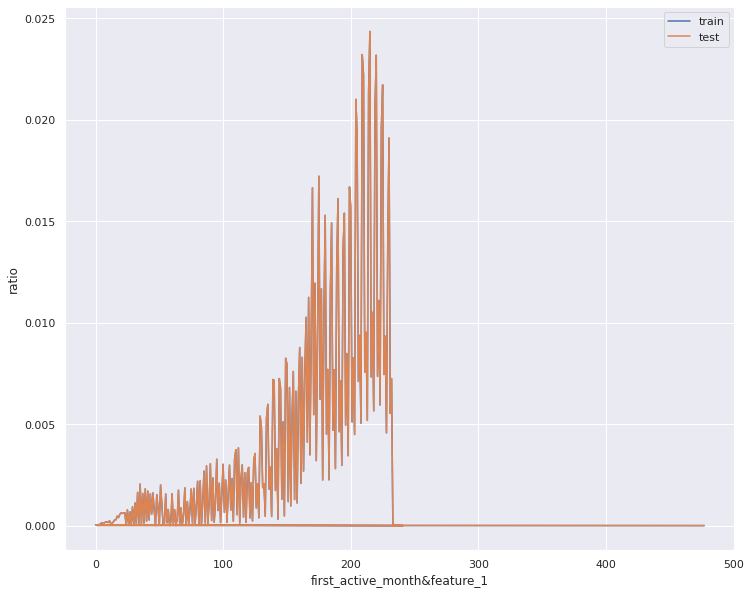

In [ ]:
# 创建新的index
index_dis = pd.Series(train_dis.index.tolist() + test_dis.index.tolist()).drop_duplicates().sort_values()

# 对缺失值填补为0
(index_dis.map(train_dis).fillna(0)).plot()
(index_dis.map(train_dis).fillna(0)).plot()

# 绘图
plt.legend(['train','test'])
plt.xlabel('&'.join(cols))
plt.ylabel('ratio')
plt.show()

能够发现其分布基本一致。当然我们可以通过如下代码快速致性所有两两变量联合分布的比较：

['first_active_month', 'feature_1']


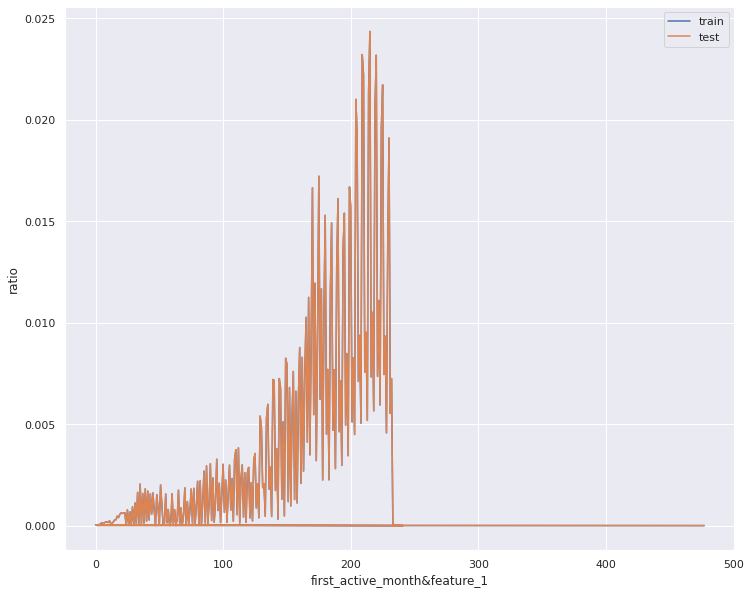

['first_active_month', 'feature_2']


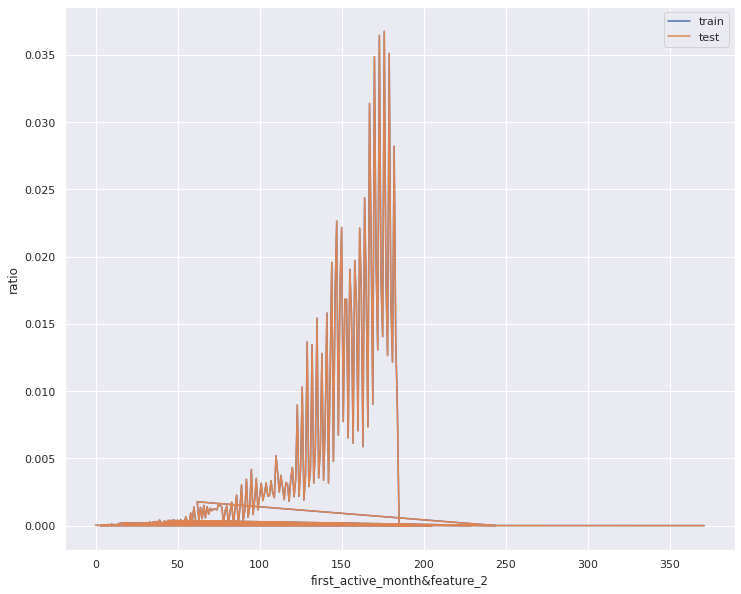

['first_active_month', 'feature_3']


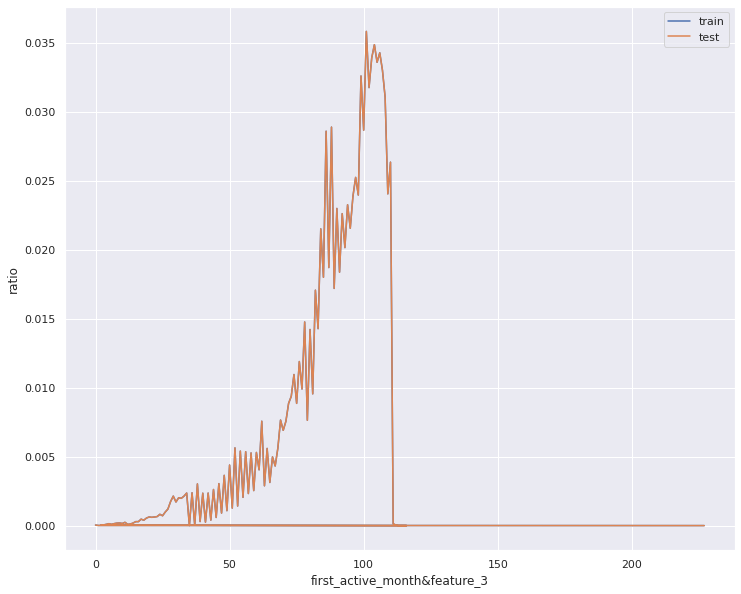

['feature_1', 'feature_2']


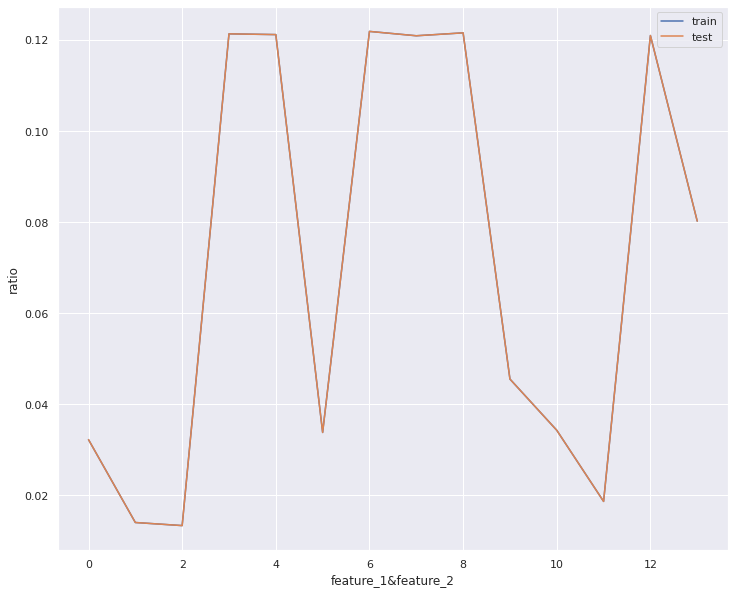

['feature_1', 'feature_3']


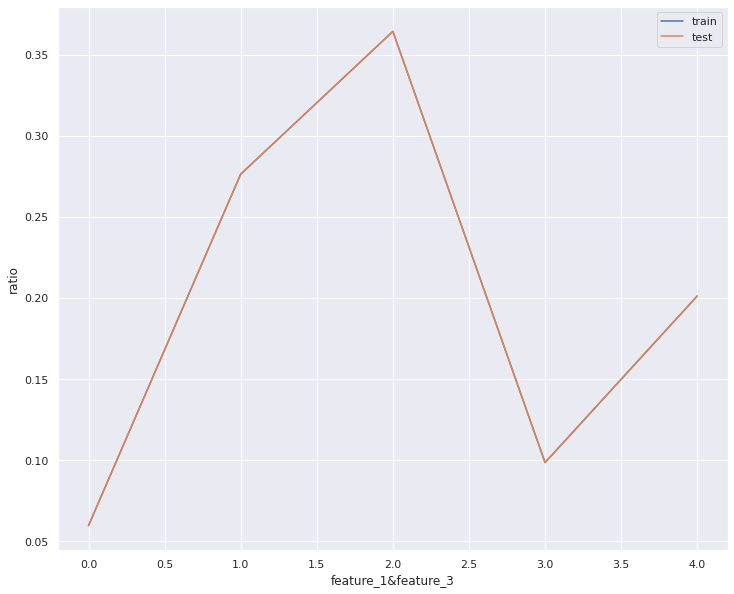

['feature_2', 'feature_3']


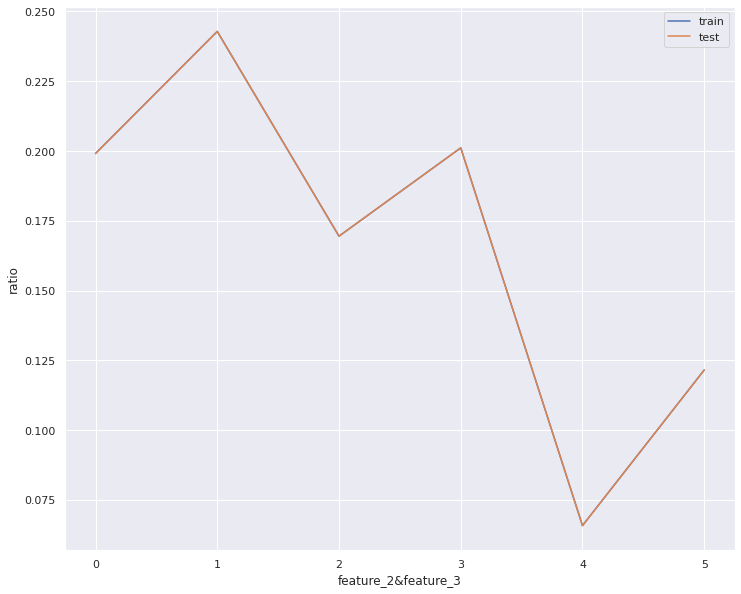

In [ ]:
n = len(features)
for i in range(n-1):
    for j in range(i+1, n):
        cols = [features[i], features[j]]
        print(cols)
        train_dis = combine_feature(train[cols]).value_counts().sort_index()/train_count
        test_dis = combine_feature(test[cols]).value_counts().sort_index()/test_count
        index_dis = pd.Series(train_dis.index.tolist() + test_dis.index.tolist()).drop_duplicates().sort_values()
        (index_dis.map(train_dis).fillna(0)).plot()
        (index_dis.map(train_dis).fillna(0)).plot()
        plt.legend(['train','test'])
        plt.xlabel('&'.join(cols))
        plt.ylabel('ratio')
        plt.show()

能够发现所有联合变量的占比分布基本一致。数据集整体质量较高，且基本可以确认，训练集和测试集取自同一样本总体。

- 规律一致性分析的实际作用

&emsp;&emsp;在实际建模过程中，规律一致性分析是非常重要但又经常容易被忽视的一个环节。通过规律一致性分析，我们可以得出非常多的可用于后续指导后续建模的关键性意见。通常我们可以根据规律一致性分析得出以下基本结论：

&emsp;&emsp;(1).如果分布非常一致，则说明所有特征均取自同一整体，训练集和测试集规律拥有较高一致性，模型效果上限较高，建模过程中应该更加依靠特征工程方法和模型建模技巧提高最终预测效果；

&emsp;&emsp;(2).如果分布不太一致，则说明训练集和测试集规律不太一致，此时模型预测效果上限会受此影响而被限制，并且模型大概率容易过拟合，在实际建模过程中可以多考虑使用交叉验证等方式防止过拟合，并且需要注重除了通用特征工程和建模方法外的trick的使用；

&emsp;&emsp;至此，我们就完成了核心数据集的数据探索，接下来，我们还将围绕其他的补充数据进行进一步的数据解读与数据清洗，并为最终的建模工作做好相关准备。

## 交易数据和商户数据的数据探索与数据清洗

&emsp;&emsp;在对train和test数据集完成探索性分析之后，接下来我们需要进一步围绕官方给出的商户数据与信用卡交易数据进行解读和分析，并对其进行数据清洗，从而为后续的特征工程和算法建模做准备。

&emsp;&emsp;一般来说，在数据解读、数据探索和初步数据清洗都是同步进行的，都是前期非常重要的工作事项。其中，数据解读的目的是为了快速获取数据集的基本信息，通过比对官方给出的字段解释，快速了解数据集的字段含义，这对于许多复杂数据场景下的建模是非常有必要的。而数据探索，顾名思义，就是快速了解数据集的基本数据情况，主要工作包括数据正确性校验和数据质量分析，核心目的是为了能够快速了解各字段的基本情况，包括默认各字段的数据类型、数据集是否存在数据不一致的情况、数据集重复值情况、缺失值情况等，当然，通过一系列的数据探索，也能够快速加深对数据集的理解。当然，数据探索结束之后，就需要进行数据清洗了，所谓数据清洗，指的是在建模/特征工程之前进行的必要的调整，以确保后续操作可执行，包括数据字段类型调整、重复值处理、缺失值处理等等，当然，有些操作可能在后续会进行些许优化，比如数据清洗阶段我们可以先尝试进行较为简单的缺失值填补，在后续的建模过程中我们还可以根据实际建模结果来调整缺失值填补策略。

&emsp;&emsp;我们也可将数据探索与数据清洗的过程总结如下：

<center><img src="https://i.loli.net/2021/10/22/caGHpfdK8kvSAF7.png" alt="image-20211022154015344" style="zoom:25%;" />

&emsp;&emsp;接下来我们将对商户数据、交易数据的三张表进行数据探索和数据清洗。

### 一、商户数据解读与探索

&emsp;&emsp;接下来我们来看主办方给出的拓展信息。也就是信用卡交易记录和商户相关数据，这几张表中同时包含了训练集、测试集中所有信用卡的部分记录，是挖掘有效信息、提高模型建模效果的重要渠道。

#### 1.数据解读

&emsp;&emsp;首先我们先来查看数据量相对较小的商户信息表，也就是merchants.csv中的相关信息。

In [ ]:
# 导入数据
merchant = pd.read_csv('merchants.csv', header=0)

In [ ]:
merchant

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334691,M_ID_1f4773aa76,1145,705,33,3.174788,-0.047556,N,A,A,1.00,...,0.99,1.019505,6,1.00,1.024796,12,Y,69,9,1.0
334692,M_ID_725a60d404,35,544,29,-0.057471,-0.057471,Y,A,A,0.89,...,0.78,0.813473,6,0.59,0.606765,12,Y,-1,-1,NaN
334693,M_ID_f2045dd267,35,561,7,-0.057471,-0.057471,N,A,A,0.96,...,0.90,0.924769,6,0.74,0.750763,8,Y,160,21,5.0
334694,M_ID_9139332ccc,35,511,7,-0.057471,-0.057471,Y,A,A,0.94,...,0.82,0.783000,6,0.65,0.584000,12,Y,-1,-1,NaN


In [ ]:
merchant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int64  
 2   merchant_category_id         334696 non-null  int64  
 3   subsector_id                 334696 non-null  int64  
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int64  
 12  avg_sales_lag6               334683 non-null  float64
 13 

数据集基本字段解释如下：

In [ ]:
# 在数据字典中查看各字段的解释
df = pd.read_excel('Data_Dictionary.xlsx', header=2, sheet_name='merchant')
df

,Columns,Description
0,merchant_id,Unique merchant identifier
1,merchant_group_id,Merchant group (anonymized )
2,merchant_category_id,Unique identifier for merchant category (anony...
3,subsector_id,Merchant category group (anonymized )
4,numerical_1,anonymized measure
5,numerical_2,anonymized measure
6,category_1,anonymized category
7,most_recent_sales_range,Range of revenue (monetary units) in last acti...
8,most_recent_purchases_range,Range of quantity of transactions in last acti...
9,avg_sales_lag3,Monthly average of revenue in last 3 months di...


实际含义如下：

| 字段 | 解释 |
| ------ | ------ |
| merchant_id | 商户id |
| merchant_group_id | 商户组id |
| merchant_category_id | 商户类别id |
| subsector_id | 商品种类群id |
| numerical_1 | 匿名数值特征1 |
| numerical_2 | 匿名数值特征2 |
| category_1 | 匿名离散特征1 |
| most_recent_sales_range | 上个活跃月份收入等级，有序分类变量A>B>...>E |
| most_recent_purchases_range | 上个活跃月份交易数量等级，有序分类变量A>B>...>E |
| avg_sales_lag3/6/12 | 过去3、6、12个月的月平均收入除以上一个活跃月份的收入 |
| avg_purchases_lag3/6/12 | 过去3、6、12个月的月平均交易量除以上一个活跃月份的交易量 |
| active_months_lag3/6/12 | 过去3、6、12个月的活跃月份数量 |
| category_2 | 匿名离散特征2 |

能够发现，数据表中提供不仅提供了商户的基本属性字段（如类别和商品种群等），同时也提供了商户近期的交易数据。不过和此前一样，仍然存在大量的匿名特征。

#### 2.数据探索

&emsp;&emsp;在理解数据字段的基本含义后，接下来我们进一步进行数据探索：

- 正确性校验

&emsp;&emsp;接下来简单对数据集的基本情况进行验证。首先是商户id出现次数的计算：

In [ ]:
print(merchant.shape, merchant['merchant_id'].nunique())

(334696, 22) 334633


能够看出，该表并不是一个id对应一条数据，存在一个商户有多条记录的情况。此外，由于商户特征较多，此处我们也可以简单验证商户数据特征是否和数据字典中特征一致：

In [ ]:
print(pd.Series(merchant.columns.tolist()).sort_values().values ==  pd.Series([va[0] for va in df.values]).sort_values().values)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


能够看出商户特征完全一致。

- 缺失值分析

&emsp;&emsp;进一步，查看商户数据缺失值情况：

In [ ]:
merchant.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

能够发现，第二个匿名分类变量存在较多缺失值，而avg_sales_lag3/6/12缺失值数量一致，则很有可能是存在13个商户同时确实了这三方面信息。其他数据没有缺失，数据整体来看较为完整。

#### 3.数据预处理

&emsp;&emsp;接下来对商户数据进行数据预处理。由于还未进行特征工程，此处预处理只是一些不影响后续特征工程、建模或多表关联的、较为初步但又是必须要做的预处理。        

  统计学中的变量（variables）大致可以分为数值变量（numrical）和分类变量（categorical）。

  数值型变量是值可以取一些列的数，这些值对于 加法、减法、求平均值等操作是有意义的。而分类变量对于上述的操作是没有意义的。

  数值变量又可以分为下面两类：
  - 离散型变量（discrete）：值只能用自然数或整数单位计算，其数值是间断的，相邻两个数值之间不再有其他数值，这种变量的取值一般使用计数方法取得。

  - 连续型变量（continuous）：在一定区间内可以任意取值，其数值是连续不断的，相邻两个数值可作无限分割，即可取无限个数值。如身高、绳子的长度等。 
  和离散型变量相比，连续型变量有“真零点”的概念，所以可以进行乘除操作。

  分类变量又可以分为下面两类：
  - 有序分类变量（ordinal）：描述事物等级或顺序，变量值可以是数值型或字符型，可以进而比较优劣，如喜欢的程度：很喜欢、一般、不喜欢 。
  - 无序分类变量（nominal）：取值之间没有顺序差别，仅做分类，又可分为二分类变量和多分类变量 二分类变量是指将全部数据分成两个类别，如男、女，对、错，阴、阳等，二分类变量是一种特殊的分类变量，有其特有的分析方法。 多分类变量是指两个以上类别，如血型分为A、B、AB、O。

  有序分类变量和无需分类变量的区别是：前者对于“比较”操作是有意义的，而后者对于“比较”操作是没有意义的。

 

  这四种数据的等级从低到高依次为：无序分类变量(nominal) <有序分类变量(ordinal)< 离散型数值变量(discrete)< 连续型数值变量(continuous)。

 下面的一张图描述了它们之间的关系：
 
 ![](https://images2018.cnblogs.com/blog/890640/201804/890640-20180426101342369-890443318.png)


- 离散/连续字段标注

&emsp;&emsp;由于商户数据集中特征同时存在分类变量和离散变量，因此我们首先可以根据字段的说明对不同属性特征进行统一的划分：

In [ ]:
category_cols = ['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'category_4', 'city_id', 'state_id', 'category_2']
numeric_cols = ['numerical_1', 'numerical_2',
     'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12']

# 检验特征是否划分完全
assert len(category_cols) + len(numeric_cols) == merchant.shape[1]

- 离散变量数据情况

&emsp;&emsp;然后简单查看离散变量当前数据情况：

In [ ]:
# 查看分类变量的取值水平
merchant[category_cols].nunique()

merchant_id                    334633
merchant_group_id              109391
merchant_category_id              324
subsector_id                       41
category_1                          2
most_recent_sales_range             5
most_recent_purchases_range         5
category_4                          2
city_id                           271
state_id                           25
category_2                          5
dtype: int64

In [ ]:
# 查看分类变量目前的类别
merchant[category_cols].dtypes

merchant_id                     object
merchant_group_id                int64
merchant_category_id             int64
subsector_id                     int64
category_1                      object
most_recent_sales_range         object
most_recent_purchases_range     object
category_4                      object
city_id                          int64
state_id                         int64
category_2                     float64
dtype: object

In [ ]:
# 查看离散变量的缺失值情况
merchant[category_cols].isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

- 离散变量的缺失值标注

&emsp;&emsp;注意到离散变量中的category_2存在较多缺失值，由于该分类变量取值水平为1-5，因此可以将缺失值先标注为-1，方便后续进行数据探索：

In [ ]:
merchant['category_2'].unique()

array([ 1.,  5., nan,  2.,  3.,  4.])

In [ ]:
merchant['category_2'] = merchant['category_2'].fillna(-1)

- 离散变量字典编码

&emsp;&emsp;接下来对离散变量进行字典编码，即将object对象类型按照sort顺序进行数值化（整数）编码。例如原始category_1取值为Y/N，通过sort排序后N在Y之前，因此在重新编码时N取值会重编码为0、Y取值会重编码为1。以此类推。

&emsp;&emsp;需要注意的是，从严格角度来说，变量类型应该是有三类，分别是连续性变量、名义型变量以及有序变量。连续变量较好理解，所谓名义变量，指的是没有数值大小意义的分类变量，例如用1表示女、0表示男，0、1只是作为性别的指代，而没有1>0的含义。而所有有序变量，其也是离散型变量，但却有数值大小含义，如上述most_recent_purchases_range字段，销售等级中A>B>C>D>E，该离散变量的5个取值水平是有严格大小意义的，该变量就被称为有序变量。

&emsp;&emsp;在实际建模过程中，如果不需要提取有序变量的数值大小信息的话，可以考虑将其和名义变量一样进行独热编码。但本阶段初级预处理时暂时不考虑这些问题，先统一将object类型转化为数值型。

In [ ]:
# 字典编码函数
def change_object_cols(se):
    value = se.unique().tolist()
    value.sort()
    return se.map(pd.Series(range(len(value)), index=value)).values

简单测试函数效果：

In [ ]:
merchant['category_1']

0         N
1         N
2         N
3         Y
4         Y
         ..
334691    N
334692    Y
334693    N
334694    Y
334695    N
Name: category_1, Length: 334696, dtype: object

In [ ]:
change_object_cols(merchant['category_1'])

array([0, 0, 0, ..., 0, 1, 0])

接下来，对merchant对象中的四个object类型列进行类别转化：

In [ ]:
for col in ['category_1', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']:
    merchant[col] = change_object_cols(merchant[col])

In [ ]:
merchant['most_recent_sales_range']

0         4
1         4
2         4
3         4
4         4
         ..
334691    0
334692    0
334693    0
334694    0
334695    0
Name: most_recent_sales_range, Length: 334696, dtype: int64

- 连续变量的数据探索

&emsp;&emsp;接下来，我们继续探索连续变量

In [ ]:
# 查看连续变量的类别
merchant[numeric_cols].dtypes

numerical_1            float64
numerical_2            float64
avg_sales_lag3         float64
avg_purchases_lag3     float64
active_months_lag3       int64
avg_sales_lag6         float64
avg_purchases_lag6     float64
active_months_lag6       int64
avg_sales_lag12        float64
avg_purchases_lag12    float64
active_months_lag12      int64
dtype: object

In [ ]:
# 连续变量的缺失值情况
merchant[numeric_cols].isnull().sum()

numerical_1             0
numerical_2             0
avg_sales_lag3         13
avg_purchases_lag3      0
active_months_lag3      0
avg_sales_lag6         13
avg_purchases_lag6      0
active_months_lag6      0
avg_sales_lag12        13
avg_purchases_lag12     0
active_months_lag12     0
dtype: int64

In [ ]:
# 查看连续变量整体情况
merchant[numeric_cols].describe()

,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000
mean,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335
std,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138
min,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000
25%,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000
50%,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000
75%,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000
max,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000


据此我们发现连续型变量中存在部分缺失值，并且部分连续变量还存在无穷值inf，需要对其进行简单处理。

- 无穷值处理

&emsp;&emsp;此处我们首先需要对无穷值进行处理。此处我们采用类似天花板盖帽法的方式对其进行修改，即将inf改为最大的显式数值。代码实现流程如下：

In [ ]:
inf_cols = ['avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12']
merchant[inf_cols] = merchant[inf_cols].replace(np.inf, merchant[inf_cols].replace(np.inf, -99).max().max()) # 这三列中所出现最大数作为inf的填充

In [ ]:
merchant[numeric_cols].describe()

,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,334696.000000,334696.000000,334683.000000,334696.000000,334696.000000,3.346830e+05,334696.000000,334696.000000,3.346830e+05,334696.000000,334696.000000
mean,0.011476,0.008103,13.832993,2.145143,2.994108,2.165079e+01,2.441947,5.947397,2.522771e+01,2.633572,11.599335
std,1.098154,1.070497,2395.489999,213.955844,0.095247,3.947108e+03,209.439373,0.394936,5.251842e+03,205.206198,1.520138
min,-0.057471,-0.057471,-82.130000,0.333495,1.000000,-8.213000e+01,0.167045,1.000000,-8.213000e+01,0.098330,1.000000
25%,-0.057471,-0.057471,0.880000,0.923650,3.000000,8.500000e-01,0.902247,6.000000,8.500000e-01,0.898333,12.000000
50%,-0.057471,-0.057471,1.000000,1.016667,3.000000,1.010000e+00,1.026961,6.000000,1.020000e+00,1.043361,12.000000
75%,-0.047556,-0.047556,1.160000,1.146522,3.000000,1.230000e+00,1.215575,6.000000,1.290000e+00,1.266480,12.000000
max,183.735111,182.079322,851844.640000,61851.333333,3.000000,1.513959e+06,61851.333333,6.000000,2.567408e+06,61851.333333,12.000000


- 缺失值处理

&emsp;&emsp;不同于无穷值的处理，缺失值处理方法有很多。但该数据集缺失数据较少，33万条数据中只有13条连续特征缺失值，此处我们先简单采用均值进行填补处理，后续若有需要再进行优化处理。

In [ ]:
for col in numeric_cols:
    merchant[col] = merchant[col].fillna(merchant[col].mean())

In [ ]:
merchant[numeric_cols].describe()

,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,3.346960e+05,334696.000000,334696.000000,3.346960e+05,334696.000000,334696.000000
mean,0.011476,0.008103,13.832993,2.145143,2.994108,2.165079e+01,2.441947,5.947397,2.522771e+01,2.633572,11.599335
std,1.098154,1.070497,2395.443476,213.955844,0.095247,3.947031e+03,209.439373,0.394936,5.251740e+03,205.206198,1.520138
min,-0.057471,-0.057471,-82.130000,0.333495,1.000000,-8.213000e+01,0.167045,1.000000,-8.213000e+01,0.098330,1.000000
25%,-0.057471,-0.057471,0.880000,0.923650,3.000000,8.500000e-01,0.902247,6.000000,8.500000e-01,0.898333,12.000000
50%,-0.057471,-0.057471,1.000000,1.016667,3.000000,1.010000e+00,1.026961,6.000000,1.020000e+00,1.043361,12.000000
75%,-0.047556,-0.047556,1.160000,1.146522,3.000000,1.230000e+00,1.215575,6.000000,1.290000e+00,1.266480,12.000000
max,183.735111,182.079322,851844.640000,61851.333333,3.000000,1.513959e+06,61851.333333,6.000000,2.567408e+06,61851.333333,12.000000


至此我们就完成了商户数据的预处理工作。

### 二、信用卡交易数据解读与探索

&emsp;&emsp;接下来对信用卡交易数据进行解读与探索。交易数据是本次竞赛中给出的规模最大、同时也是信息量最大的数据集，在后续建模过程中将发挥至关重要的作用。

#### 1.数据解读与验证

&emsp;&emsp;首先还是对数据集进行解释，以及简单验证数据集的正确性。信用卡交易记录包括了两个数据集，分别是historical_transactions和new_merchant_transactions。两个数据集字段类似，只是记录了不同时间区间的信用卡消费情况：

- historical_transactions：信用卡消费记录

&emsp;&emsp;该数据集记录了每张信用卡在特定商户中、三个月间的消费记录。该数据集数据规模较大，文件约有2.6G，并非必要建模字段，但若能从中提取有效信息，则能够更好的辅助建模。

In [ ]:
history_transaction = pd.read_csv('historical_transactions.csv', header=0)

In [ ]:
history_transaction.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
history_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


能够看到，数据集总共包括将近三千万条数据，总共有十四个字段，每个字段在数据字典中的解释如下：

In [ ]:
pd.read_excel('Data Dictionary.xlsx', header=2, sheet_name='history')

,Columns,Description
0,card_id,Card identifier
1,month_lag,month lag to reference date
2,purchase_date,Purchase date
3,authorized_flag,"Y' if approved, 'N' if denied"
4,category_3,anonymized category
5,installments,number of installments of purchase
6,category_1,anonymized category
7,merchant_category_id,Merchant category identifier (anonymized )
8,subsector_id,Merchant category group identifier (anonymized )
9,merchant_id,Merchant identifier (anonymized)


实际含义如下：

| 字段 | 解释 |
| ------ | ------ |
| card_id | 第一无二的信用卡标志 |
| authorized_flag | 是否授权，Y/N |
| city_id | 城市id，经过匿名处理 |
| category_1 | 匿名特征，Y/N |
| installments | 分期付款的次数 |
| category_3 | 匿名类别特征，A/.../E |
| merchant_category_id | 商户类别，匿名特征 |
| merchant_id | 商户id |
| month_lag	 | 距离2018年月的2月数差 |
| purchase_amount | 标准化后的付款金额 |
| purchase_date | 付款时间 |
| category_2 | 匿名类别特征2 |
| state_id | 州id，经过匿名处理 |
| subsector_id | 商户类别特征 |

- new_merchant_transactions：信用卡近期的交易信息

&emsp;&emsp;信用卡在2018年2月之后的交易信息，和historical_transactions字段完全一致。

In [ ]:
new_transaction = pd.read_csv('new_merchant_transactions.csv', header=0)

In [ ]:
new_transaction.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [ ]:
pd.read_csv('new_merchant_transactions.csv', header=0).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


该数据中总共有将近200万条数据。并且我们发现，该数据集中有较多字段和商家数据merchant重复，我们可以对其进行简单检验。

- 对比merchant数据集

首先简单查看有哪些字段一致：

In [ ]:
duplicate_cols = []

for col in merchant.columns:
    if col in new_transaction.columns:
        duplicate_cols.append(col)
        
print(duplicate_cols)

['merchant_id', 'merchant_category_id', 'subsector_id', 'category_1', 'city_id', 'state_id', 'category_2']


并且我们进一步发现，交易记录中的merhcant_id信息并不唯一：

In [ ]:
# 取出和商户数据表重复字段并去重
new_transaction[duplicate_cols].drop_duplicates().shape

(291242, 7)

In [ ]:
# 商户id去重
new_transaction['merchant_id'].nunique()

226129

造成该现象的原因可能是商铺在逐渐经营过程动态变化，而基于此，在后续的建模过程中，我们将优先使用交易记录中表中的相应记录。

#### 2.数据预处理

&emsp;&emsp;接下来对交易数据进行预处理。

- 连续/离散字段标注

&emsp;&emsp;首先也是一样，需要对其连续/离散变量进行标注。当然该数据集中比较特殊的一点，是存在一个时间列，我们将其单独归为一类：

In [ ]:
numeric_cols = ['installments', 'month_lag', 'purchase_amount']
category_cols = ['authorized_flag', 'card_id', 'city_id', 'category_1',
       'category_3', 'merchant_category_id', 'merchant_id', 'category_2', 'state_id',
       'subsector_id']
time_cols = ['purchase_date']

assert len(numeric_cols) + len(category_cols) + len(time_cols) == new_transaction.shape[1]

- 字段类型转化/缺失值填补

&emsp;&emsp;然后简单查看离散变量当前数据情况：

In [ ]:
# 查看分类变量的类别
new_transaction[category_cols].dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
category_3               object
merchant_category_id      int64
merchant_id              object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [ ]:
new_transaction[category_cols].isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
category_3               55922
merchant_category_id         0
merchant_id              26216
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

和此前的merchant处理类似，我们对其object类型对象进行字典编码（id除外），并对利用-1对缺失值进行填补：

In [ ]:
for col in ['authorized_flag', 'category_1', 'category_3']:
    new_transaction[col] = change_object_cols(new_transaction[col].fillna(-1).astype(str))
    
new_transaction[category_cols] = new_transaction[category_cols].fillna(-1)

In [ ]:
new_transaction[category_cols].dtypes

authorized_flag           int64
card_id                  object
city_id                   int64
category_1                int64
category_3                int64
merchant_category_id      int64
merchant_id              object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

&emsp;&emsp;至此，我们就完成了几张表的数据预处理工作。

### 三、数据清洗后数据生成

#### 1.回顾商户数据、交易数据清洗流程

&emsp;&emsp;当然，由于上述工作较为繁琐，我们简单总结上述针对商户数据和交易数据的完整步骤如下：

#### 商户数据merchants.csv

- 划分连续字段和离散字段；      
- 对字符型离散字段进行字典排序编码；      
- 对缺失值处理，此处统一使用-1进行缺失值填充，本质上是一种标注；      
- 对连续性字段的无穷值进行处理，用该列的最大值进行替换；       
- 去除重复数据；

#### 交易数据new_merchant_transactions.csv和historical_transactions.csv

- 划分字段类型，分为离散字段、连续字段和时间字段；      
- 和商户数据的处理方法一样，对字符型离散字段进行字典排序，对缺失值进行统一填充；      
- 对新生成的购买欲分离散字段进行字典排序编码；      
- 最后对多表进行拼接，并且通过month_lag字段是否大于0来进行区分。

#### 2.创建清洗后数据

&emsp;&emsp;结合训练集和测试集的清洗流程，我们可以在此统一执行所有数据的数据清洗工作，并将其最终保存为本地文件，方便后续特征工程及算法建模过程使用，其流程如下：

- 读取数据

In [136]:
import gc
import time
import numpy as np
import pandas as pd
from datetime import datetime

In [137]:
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')
merchant = pd.read_csv('merchants.csv')
new_transaction = pd.read_csv('new_merchant_transactions.csv')
history_transaction = pd.read_csv('historical_transactions.csv')

In [138]:
# 字典编码函数
def change_object_cols(se):
    value = se.unique().tolist()
    value.sort()
    return se.map(pd.Series(range(len(value)), index=value)).values

- 训练集/测试集的数据预处理

In [139]:
# 对首次活跃月份进行编码
se_map = change_object_cols(train['first_active_month'].append(test['first_active_month']).astype(str))
train['first_active_month'] = se_map[:train.shape[0]]
test['first_active_month'] = se_map[train.shape[0]:]

- 测试集/训练集导出与内存清理

In [144]:
train.to_csv("preprocess/train_pre.csv", index=False)
test.to_csv("preprocess/test_pre.csv", index=False)

In [145]:
del train
del test
gc.collect()

1116

- 商户信息预处理

In [146]:
# 1、根据业务含义划分离散字段category_cols与连续字段numeric_cols。
category_cols = ['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'category_4', 'city_id', 'state_id', 'category_2']
numeric_cols = ['numerical_1', 'numerical_2',
     'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12']

# 2、对非数值型的离散字段进行字典排序编码。
for col in ['category_1', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']:
    merchant[col] = change_object_cols(merchant[col])
    
# 3、为了能够更方便统计，进行缺失值的处理，对离散字段统一用-1进行填充。
merchant[category_cols] = merchant[category_cols].fillna(-1)


# 4、对离散型字段探查发现有正无穷值，这是特征提取以及模型所不能接受的，因此需要对无限值进行处理，此处采用最大值进行替换。
inf_cols = ['avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12']
merchant[inf_cols] = merchant[inf_cols].replace(np.inf, merchant[inf_cols].replace(np.inf, -99).max().max())

# 5、平均值进行填充，后续有需要再进行优化处理。
for col in numeric_cols:
    merchant[col] = merchant[col].fillna(merchant[col].mean())
    
# 6、去除与transaction交易记录表格重复的列，以及merchant_id的重复记录。
duplicate_cols = ['merchant_id', 'merchant_category_id', 'subsector_id', 'category_1', 'city_id', 'state_id', 'category_2']
merchant = merchant.drop(duplicate_cols[1:], axis=1)
merchant = merchant.loc[merchant['merchant_id'].drop_duplicates().index.tolist()].reset_index(drop=True)

与处理完后先不着急导出或删除，后续需要和交易数据进行拼接。

- 交易数据预处理

In [147]:
# 1、为了统一处理，首先拼接new和history两张表格，后续可以month_lag>=0进行区分。
transaction = pd.concat([new_transaction, history_transaction], axis=0, ignore_index=True)
del new_transaction
del history_transaction
gc.collect()

# 2、同样划分离散字段、连续字段以及时间字段。
numeric_cols = [ 'installments', 'month_lag', 'purchase_amount']
category_cols = ['authorized_flag', 'card_id', 'city_id', 'category_1',
       'category_3', 'merchant_category_id', 'merchant_id', 'category_2', 'state_id',
       'subsector_id']
time_cols = ['purchase_date']

# 3、可仿照merchant的处理方式对字符型的离散特征进行字典序编码以及缺失值填充。
for col in ['authorized_flag', 'category_1', 'category_3']:
    transaction[col] = change_object_cols(transaction[col].fillna(-1).astype(str))
transaction[category_cols] = transaction[category_cols].fillna(-1)
transaction['category_2'] = transaction['category_2'].astype(int)

# 4、进行时间段的处理，简单起见进行月份、日期的星期数（工作日与周末）、以及
# 时间段（上午、下午、晚上、凌晨）的信息提取。
transaction['purchase_month'] = transaction['purchase_date'].apply(lambda x:'-'.join(x.split(' ')[0].split('-')[:2]))
transaction['purchase_hour_section'] = transaction['purchase_date'].apply(lambda x: x.split(' ')[1].split(':')[0]).astype(int)//6
transaction['purchase_day'] = transaction['purchase_date'].apply(lambda x: datetime.strptime(x.split(" ")[0], "%Y-%m-%d").weekday())//5                                                                    
del transaction['purchase_date']


# 5、对新生成的购买月份离散字段进行字典序编码。
transaction['purchase_month'] = change_object_cols(transaction['purchase_month'].fillna(-1).astype(str))

完成交易数据预处理后，即可进行交易数据和商铺数据的表格合并。

- 表格合并

&emsp;&emsp;在合并的过程中，有两种处理方案，其一是对缺失值进行-1填补，然后将所有离散型字段化为字符串类型（为了后续字典合并做准备），其二则是新增两列，分别是purchase_day_diff和purchase_month_diff，其数据为交易数据以card_id进行groupby并最终提取出purchase_day/month并进行差分的结果。

方案一代码如下：

In [ ]:
# 为了方便特征的统一计算将其merge合并，重新划分相应字段种类。
cols = ['merchant_id', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']
transaction = pd.merge(transaction, merchant[cols], how='left', on='merchant_id')

numeric_cols = ['purchase_amount', 'installments']

category_cols = ['authorized_flag', 'city_id', 'category_1',
       'category_3', 'merchant_category_id','month_lag','most_recent_sales_range',
                 'most_recent_purchases_range', 'category_4',
                 'purchase_month', 'purchase_hour_section', 'purchase_day']

id_cols = ['card_id', 'merchant_id']

transaction[cols[1:]] = transaction[cols[1:]].fillna(-1).astype(int)
transaction[category_cols] =transaction[category_cols].fillna(-1).astype(str)

&emsp;&emsp;随后将其导出为transaction_d_pre.csv

In [ ]:
transaction.to_csv("preprocess/transaction_d_pre.csv", index=False)

In [ ]:
del transaction
gc.collect()

方案二代码如下：

In [ ]:
merchant = pd.read_csv('data/merchants.csv')
new_transaction = pd.read_csv('data/new_merchant_transactions.csv')
history_transaction = pd.read_csv('data/historical_transactions.csv')

In [ ]:
# 1、根据业务含义划分离散字段category_cols与连续字段numeric_cols。
category_cols = ['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'category_4', 'city_id', 'state_id', 'category_2']
numeric_cols = ['numerical_1', 'numerical_2',
     'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12']

# 2、对非数值型的离散字段进行字典排序编码。
for col in ['category_1', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']:
    merchant[col] = change_object_cols(merchant[col])
    
# 3、为了能够更方便统计，进行缺失值的处理，对离散字段统一用-1进行填充。
merchant[category_cols] = merchant[category_cols].fillna(-1)


# 4、对离散型字段探查发现有正无穷值，这是特征提取以及模型所不能接受的，因此需要对无限值进行处理，此处采用最大值进行替换。
inf_cols = ['avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12']
merchant[inf_cols] = merchant[inf_cols].replace(np.inf, merchant[inf_cols].replace(np.inf, -99).max().max())

# 5、平均值进行填充，后续有需要再进行优化处理。
for col in numeric_cols:
    merchant[col] = merchant[col].fillna(merchant[col].mean())
    
# 6、去除与transaction交易记录表格重复的列，以及merchant_id的重复记录。
duplicate_cols = ['merchant_id', 'merchant_category_id', 'subsector_id', 'category_1', 'city_id', 'state_id', 'category_2']
merchant = merchant.drop(duplicate_cols[1:], axis=1)
merchant = merchant.loc[merchant['merchant_id'].drop_duplicates().index.tolist()].reset_index(drop=True)

In [ ]:
# 1、为了统一处理，首先拼接new和history两张表格，后续可以month_lag>=0进行区分。
transaction = pd.concat([new_transaction, history_transaction], axis=0, ignore_index=True)
del new_transaction
del history_transaction
gc.collect()

# 2、同样划分离散字段、连续字段以及时间字段。
numeric_cols = [ 'installments', 'month_lag', 'purchase_amount']
category_cols = ['authorized_flag', 'card_id', 'city_id', 'category_1',
       'category_3', 'merchant_category_id', 'merchant_id', 'category_2', 'state_id',
       'subsector_id']
time_cols = ['purchase_date']

# 3、可仿照merchant的处理方式对字符型的离散特征进行字典序编码以及缺失值填充。
for col in ['authorized_flag', 'category_1', 'category_3']:
    transaction[col] = change_object_cols(transaction[col].fillna(-1).astype(str))
transaction[category_cols] = transaction[category_cols].fillna(-1)
transaction['category_2'] = transaction['category_2'].astype(int)

# 4、进行时间段的处理，简单起见进行月份、日期的星期数（工作日与周末）、以及
# 时间段（上午、下午、晚上、凌晨）的信息提取。
transaction['purchase_month'] = transaction['purchase_date'].apply(lambda x:'-'.join(x.split(' ')[0].split('-')[:2]))
transaction['purchase_hour_section'] = transaction['purchase_date'].apply(lambda x: x.split(' ')[1].split(':')[0]).astype(int)//6
transaction['purchase_day'] = transaction['purchase_date'].apply(lambda x: datetime.strptime(x.split(" ")[0], "%Y-%m-%d").weekday())//5                                                                    
del transaction['purchase_date']


# 5、对新生成的购买月份离散字段进行字典序编码。
transaction['purchase_month'] = change_object_cols(transaction['purchase_month'].fillna(-1).astype(str))

In [ ]:
cols = ['merchant_id', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']
transaction = pd.merge(transaction, merchant[cols], how='left', on='merchant_id')

numeric_cols = ['purchase_amount', 'installments']

category_cols = ['authorized_flag', 'city_id', 'category_1',
       'category_3', 'merchant_category_id','month_lag','most_recent_sales_range',
                 'most_recent_purchases_range', 'category_4',
                 'purchase_month', 'purchase_hour_section', 'purchase_day']

id_cols = ['card_id', 'merchant_id']

transaction['purchase_day_diff'] = transaction.groupby("card_id")['purchase_day'].diff()
transaction['purchase_month_diff'] = transaction.groupby("card_id")['purchase_month'].diff()

&emsp;&emsp;随后将其导出为transaction_g_pre.csv

In [ ]:
transaction.to_csv("preprocess/transaction_g_pre.csv", index=False)

In [ ]:
del transaction
gc.collect()

在导出完成这两张表之后，接下来我们将借助这些数据来进一步致性特征工程和算法建模。

## 特征工程与模型训练

&emsp;&emsp;在经历了漫长的数据解读、探索与清洗之后，接下来，我们将进入到特征工程与算法建模的环节。并在本小节的结尾，得出最终的预测结果。

&emsp;&emsp;在此前的内容中，我们最终得到了train.csv、test.csv和transaction.csv三张表。首先我们简单回顾下这三张数据表的构建过程，首先，目前得到的训练集和测试集都是由原始训练集/测试集将时间字段处理后得到：

<center><img src="https://i.loli.net/2021/10/23/EfkhZ7FT89dCacb.png" alt="image-20211023143401397" style="zoom:50%;" />

&emsp;&emsp;而transaction数据集则相对复杂，该数据集是有一张商户数据merchants.csv和两张交易数据表处理后合并得到，该过程如下所示：

<center><img src="https://i.loli.net/2021/10/23/vwXiQcd3sWfqhSY.png" alt="image-20211023144942013" style="zoom:80%;" />

接下来，我们就依据这三张表进行后续操作。

### 一、特征工程

&emsp;&emsp;首先需要对得到的数据进一步进行特征工程处理。一般来说，对于已经清洗完的数据，特征工程部分核心需要考虑的问题就是特征创建（衍生）与特征筛选，也就是先尽可能创建/增加可能对模型结果有正面影响的特征，然后再对这些进行挑选，以保证模型运行稳定性及运行效率。当然，无论是特征衍生还是特征筛选，其实都有非常多的方法。此处为了保证公开课提供的思路和方法具有通用性，此处列举两种特征衍生的方法，即创建通用组合特征与业务统计特征；并在特征创建完毕后，介绍一种基础而通用的特征筛选的方法：基于皮尔逊相关系数的Filter方法进行特征筛选。这些方法都是非常通用且有效的方法，不仅能够帮助本次建模取得较好的成果，并且也能广泛适用到其他各场景中。

#### 1.通用组合特征创建

##### 1.1 通用组合特征的创建方法

&emsp;&emsp;首先是尝试创建一些通用组合特征。

&emsp;&emsp;所谓通用组合特征，指的是通过统计不同离散特征在不同取值水平下、不同连续特征取值之和创建的特征，并根据card_id进行分组求和。具体创建过程我们可以如下简例来进行理解：

<center><img src="https://i.loli.net/2021/10/23/KUTtb32o9eS1MJW.png" alt="image-20211023153800138" style="zoom:67%;" />

通过该方法创建的数据集，不仅能够尽可能从更多维度表示每个card_id的消费情况，同时也能够顺利和训练集/测试集完成拼接，从而带入模型进行建模。相关过程我们可以借助Python中的字典对象类型来进行实现，上述简例实现过程如下：

In [ ]:
import gc
import time
import numpy as np
import pandas as pd
from datetime import datetime

In [ ]:
# 借助字典创建DataFrame
d1 = {'card_id':[1, 2, 1, 3], 
      'A':[1, 2, 1, 2], 
      'B':[2, 1, 2, 2], 
      'C':[4, 5, 1, 5], 
      'D':[7, 5, 4, 8],}

t1 = pd.DataFrame(t1)
t1

,card_id,A,B,C,D
0,1,1,2,4,7
1,2,2,1,5,5
2,1,1,2,1,4
3,3,2,2,5,8


In [ ]:
# 标注特征类别
numeric_cols = ['C', 'D']
category_cols = ['A', 'B']

In [ ]:
# 创建一个以id为key、空字典为value的字典
features = {}
card_all = t1['card_id'].values.tolist()
for card in card_all:
    features[card] = {}

In [ ]:
features

{1: {}, 2: {}, 3: {}}

In [ ]:
# 所有字段名称组成的list
columns = t1.columns.tolist()
columns

['card_id', 'A', 'B', 'C', 'D']

In [ ]:
# 其中card_id在list当中的索引值
idx = columns.index('card_id')
idx

0

In [ ]:
# 离散型字段的索引值
category_cols_index = [columns.index(col) for col in category_cols]
category_cols_index

[1, 2]

In [ ]:
# 连续型字段的索引值
numeric_cols_index = [columns.index(col) for col in numeric_cols]
numeric_cols_index

[3, 4]

In [ ]:
# 对离散型字段的不同取值和连续型字段两两组合
# 同时完成分组求和
for i in range(t1.shape[0]):
    va = t1.loc[i].values
    card = va[idx]
    for cate_ind in category_cols_index:
        for num_ind in numeric_cols_index:
            col_name = '&'.join([columns[cate_ind], str(va[cate_ind]), columns[num_ind]])
            features[card][col_name] = features[card].get(col_name, 0) + va[num_ind]

&emsp;&emsp;然后查看features最终结果

In [ ]:
features

{1: {'A&1&C': 5, 'A&1&D': 11, 'B&2&C': 5, 'B&2&D': 11},
 2: {'A&2&C': 5, 'A&2&D': 5, 'B&1&C': 5, 'B&1&D': 5},
 3: {'A&2&C': 5, 'A&2&D': 8, 'B&2&C': 5, 'B&2&D': 8}}

能够发现，此时features就是一个已经包含了离散变量的不同取值和连续变量两两组合成新特征后在不同card_id下的分组求和结果。接下来我们将其转化为DataFrame：

In [ ]:
# 转化成df
df = pd.DataFrame(features).T.reset_index()

# 标注所有列
cols = df.columns.tolist()

# 修改df的特征名称
df.columns = ['card_id'] + cols[1:]
df

,card_id,A&1&C,A&1&D,B&2&C,B&2&D,A&2&C,A&2&D,B&1&C,B&1&D
0,1,5.0,11.0,5.0,11.0,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0
2,3,NaN,NaN,5.0,8.0,5.0,8.0,NaN,NaN


至此我们就完成了在极简数据集上进行通用组合特征的创建工作。

&emsp;&emsp;当然，通过上述过程不难发现，这种特征创建的方式能够非常高效的表示更多数据集中的隐藏信息，不过该方法容易产生较多空值，在后续建模过程中需要考虑特征矩阵过于稀疏从而带来的问题。

##### 1.2 基于transaction数据集创建通用组合特征

&emsp;&emsp;接下来，我们将上述过程应用于建模真实数据，即在此前已经清洗完的transaction数据集上来完成通用组合特征的创建工作。

> 此处需要注意的是，由于transaction数据集本身较大，尽管特征创建工作的求和部分会一定程度减少最终带入建模的数据体量，但操作transaction数据集本身就需要耗费大量的内容及一定的时间，如果要手动执行下述代码，建议至少配置32G及以上内存。当然，处理完的数据也会在课件领取地址中提供，大家也可以直接利用处理完的数据带入进行建模。

- 数据读取

&emsp;&emsp;此处读取的transaction是此前创建的transaction_d_pre.csv数据集。

In [ ]:
train = pd.read_csv('preprocess/train_pre.csv')
test =  pd.read_csv('preprocess/test_pre.csv')
transaction = pd.read_csv('preprocess/transaction_d_pre.csv')

- 字段类型标注

In [ ]:
# 标注离散字段or连续型字段
numeric_cols = ['purchase_amount', 'installments']

category_cols = ['authorized_flag', 'city_id', 'category_1',
       'category_3', 'merchant_category_id','month_lag','most_recent_sales_range',
                 'most_recent_purchases_range', 'category_4',
                 'purchase_month', 'purchase_hour_section', 'purchase_day']

id_cols = ['card_id', 'merchant_id']

- 特征创建

In [ ]:
# 创建字典用于保存数据
features = {}
card_all = train['card_id'].append(test['card_id']).values.tolist()
for card in card_all:
    features[card] = {}
     
# 标记不同类型字段的索引
columns = transaction.columns.tolist()
idx = columns.index('card_id')
category_cols_index = [columns.index(col) for col in category_cols]
numeric_cols_index = [columns.index(col) for col in numeric_cols]

# 记录运行时间
s = time.time()
num = 0

# 执行循环，并在此过程中记录时间
for i in range(transaction.shape[0]):
    va = transaction.loc[i].values
    card = va[idx]
    for cate_ind in category_cols_index:
        for num_ind in numeric_cols_index:
            col_name = '&'.join([columns[cate_ind], va[cate_ind], columns[num_ind]])
            features[card][col_name] = features[card].get(col_name, 0) + va[num_ind]
    num += 1
    if num%1000000==0:
        print(time.time()-s, "s")
del transaction
gc.collect()

142.746732711792 s
241.50783610343933 s
338.9149408340454 s
436.4667372703552 s
533.113107919693 s
629.66761469841 s
727.1969571113586 s
824.3946213722229 s
921.0717754364014 s
1017.7034878730774 s
1114.4361855983734 s
1211.2046930789948 s
1308.0264575481415 s
1404.8067374229431 s
1501.533932209015 s
1598.396145105362 s
1695.2529389858246 s
1792.5994687080383 s
1889.7299542427063 s
1987.0093190670013 s
2084.849946975708 s
2183.5546836853027 s
2281.704159259796 s
2379.819750070572 s
2478.2387039661407 s
2576.8626248836517 s
2676.383053302765 s
2777.3995122909546 s
2879.5466351509094 s
2981.8099772930145 s
3085.8226635456085 s


0

&emsp;&emsp;能够发现，整体运行所需时间较长。此外，此处需要注意的是，card_id的提取并不是从transaction从提取，而是从训练集和测试集中提取，大家想想看是什么原因？

&emsp;&emsp;在提取完特征后，接下来即可将带有交易数据特征的合并入训练集和测试集了：

In [ ]:
# 字典转dataframe
df = pd.DataFrame(features).T.reset_index()
del features
cols = df.columns.tolist()
df.columns = ['card_id'] + cols[1:]

# 生成训练集与测试集
train = pd.merge(train, df, how='left', on='card_id')
test =  pd.merge(test, df, how='left', on='card_id')
del df
train.to_csv("preprocess/train_dict.csv", index=False)
test.to_csv("preprocess/test_dict.csv", index=False)

gc.collect()

&emsp;&emsp;至此，我们就完成了从transaction中提取通用特征的过程。简单查看数据集基本情况：

<center><img src="https://i.loli.net/2021/10/23/ZY75eSk3pAayoJn.png" alt="image-20211023161451438" style="zoom:67%;" />

#### 2.业务统计特征创建

&emsp;&emsp;当然，除了通用组合特征外，我们还可以考虑从另一个角度进行特征提取，那就是先根据card_id来进行分组，然后统计不同字段再各组内的相关统计量，再将其作为特征，带入进行建模。其基本构造特征思路如下：

<center><img src="https://i.loli.net/2021/10/23/NupDc9JnBbHRPgU.png" alt="image-20211023162730619" style="zoom:80%;" />

该过程并不复杂，可以通过pandas中的groupby过程迅速实现。和此前特征构造的思路不同，通过该方法构造的特征，不会存在大量的缺失值，并且新增的列也将相对较少。代码实现过程如下：

- 数据读取：

In [ ]:
transaction = pd.read_csv('preprocess/transaction_g_pre.csv')

- 字段类型标注

In [ ]:
# 标注离散字段or连续型字段
numeric_cols = ['authorized_flag',  'category_1', 'installments',
       'category_3',  'month_lag','purchase_month','purchase_day','purchase_day_diff', 'purchase_month_diff',
       'purchase_amount', 'category_2', 
       'purchase_month', 'purchase_hour_section', 'purchase_day',
       'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']
categorical_cols = ['city_id', 'merchant_category_id', 'merchant_id', 'state_id', 'subsector_id']

- 特征提取过程

In [ ]:
# 创建空字典
aggs = {}

# 连续/离散字段统计量提取范围
for col in numeric_cols:
    aggs[col] = ['nunique', 'mean', 'min', 'max','var','skew', 'sum']
for col in categorical_cols:
    aggs[col] = ['nunique']    
aggs['card_id'] = ['size', 'count']
cols = ['card_id']

# 借助groupby实现统计量计算
for key in aggs.keys():
    cols.extend([key+'_'+stat for stat in aggs[key]])

df = transaction[transaction['month_lag']<0].groupby('card_id').agg(aggs).reset_index()
df.columns = cols[:1] + [co+'_hist' for co in cols[1:]]

df2 = transaction[transaction['month_lag']>=0].groupby('card_id').agg(aggs).reset_index()
df2.columns = cols[:1] + [co+'_new' for co in cols[1:]]
df = pd.merge(df, df2, how='left',on='card_id')

df2 = transaction.groupby('card_id').agg(aggs).reset_index()
df2.columns = cols
df = pd.merge(df, df2, how='left',on='card_id')
del transaction
gc.collect()

# 生成训练集与测试集
train = pd.merge(train, df, how='left', on='card_id')
test =  pd.merge(test, df, how='left', on='card_id')
del df
train.to_csv("preprocess/train_groupby.csv", index=False)
test.to_csv("preprocess/test_groupby.csv", index=False)

gc.collect()

执行完毕后，我们也可以简单查看数据集基本情况：

<center><img src="https://i.loli.net/2021/10/23/HpI1QuM6ZvtkS7f.png" alt="image-20211023162707542" style="zoom:67%;" />

#### 3.数据合并

&emsp;&emsp;至此，我们即完成了从两个不同角度提取特征的相关工作。不过截至目前上述两套方案的特征仍然保存在不同数据文件中，我们需要对其进行合并，才能进一步带入进行建模，合并过程较为简单，只需要将train_dict(test_dict)与train_group(test_group)根据card_id进行横向拼接、然后剔除重复列即可，实现过程如下所示：

- 数据读取

In [ ]:
train_dict = pd.read_csv("preprocess/train_dict.csv")
test_dict = pd.read_csv("preprocess/test_dict.csv")
train_groupby = pd.read_csv("preprocess/train_groupby.csv")
test_groupby = pd.read_csv("preprocess/test_groupby.csv")

- 剔除重复列

In [ ]:
for co in train_dict.columns:
    if co in train_groupby.columns and co!='card_id':
        del train_groupby[co]
for co in test_dict.columns:
    if co in test_groupby.columns and co!='card_id':
        del test_groupby[co]

- 拼接特征

In [ ]:
train = pd.merge(train_dict, train_groupby, how='left', on='card_id').fillna(0)
test = pd.merge(test_dict, test_groupby, how='left', on='card_id').fillna(0)

> 注，上述操作对缺失值进行了0的填补，此处缺失值并非真正的缺失值，该缺失值只是在特征创建过程没有统计结果的值，这些值从逻辑上来讲其实也都是0。因此此处缺失值填补相当于是数据补全。

- 数据保存与内存管理

In [ ]:
train.to_csv("preprocess/train.csv", index=False)
test.to_csv("preprocess/test.csv", index=False)

del train_dict, test_dict, train_groupby, test_groupby
gc.collect()

352

### 二、随机森林模型预测

&emsp;&emsp;在准备好了基础特征之后，终于迎来了算法建模环节。限于公开课篇幅，此处重点介绍关于集成算法中的随机森林模型的建模及优化流程，并最终展示建模结果。

In [ ]:
train = pd.read_csv("preprocess/train.csv")
test = pd.read_csv("preprocess/test.csv")

- 特征选择

&emsp;&emsp;由于此前创建了数千条特征，若带入全部特征进行建模，势必极大程度延长模型建模时间，并且带入太多无关特征对模型结果提升有限，因此此处我们借助皮尔逊相关系数，挑选和标签最相关的300个特征进行建模。当然此处300也可以自行调整。

In [ ]:
# 提取特征名称
features = train.columns.tolist()
features.remove("card_id")
features.remove("target")
featureSelect = features[:]

# 计算相关系数
corr = []
for fea in featureSelect:
    corr.append(abs(train[[fea, 'target']].fillna(0).corr().values[0][1]))

# 取top300的特征进行建模，具体数量可选
se = pd.Series(corr, index=featureSelect).sort_values(ascending=False)
feature_select = ['card_id'] + se[:300].index.tolist()

# 输出结果
train = train[feature_select + ['target']]
test = test[feature_select]

> 注意，此处可以通过皮尔逊相关系数进行特征提取的主要原因也是在于我们在特征创建的过程中，将所有特征都默认为连续性变量

- 借助网格搜索进行参数调优

&emsp;&emsp;接下来，我们将借助sklearn中基础调参工具—网格搜索（Gridsearch）进行参数搜索与调优。

&emsp;&emsp;首先导入相关包，包括均方误差计算函数、随机森林评估器和网格搜索评估器：

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

然后根据网格搜索的要求，我们需要根据随机森林的参数情况，有针对性的创造一个参数空间，随机森林基本参数基本情况如下：

|Name|Description|      
|:--:|:--:| 
|criterion|规则评估指标或损失函数，默认基尼系数，可选信息熵| 
|splitter|树模型生长方式，默认以损失函数取值减少最快方式生长，可选随机根据某条件进行划分|
|max_depth|树的最大生长深度，类似max_iter，即总共迭代几次| 
|min_samples_split|内部节点再划分所需最小样本数| 
|min_samples_leaf|叶节点包含最少样本数| 
|min_weight_fraction_leaf|叶节点所需最小权重和| 
|max_features|在进行切分时候最多带入多少个特征进行划分规则挑选|
|random_state|随机数种子| 
|max_leaf_nodes|叶节点最大个数| 
|min_impurity_decrease|数据集再划分至少需要降低的损失值| 
|min_impurity_split|数据集再划分所需最低不纯度，将在0.25版本中移除| 
|class_weight|各类样本权重| 

其中我们挑选"n_estimators"、"min_samples_leaf"、"min_samples_split"、"max_depth"和"max_features"进行参数搜索：

&emsp;&emsp;然后是关于网格搜索工具的选择。随着sklearn不断完善，有越来越多的网格搜索工具可供选择，但整体来看其实就是在效率和精度之间做权衡，有些网格搜索工具由于是全域枚举（如GridSearchCV），所以执行效率较慢、但结果精度有保障，而如果愿意牺牲精度换执行效率，则也有很多工具可以选择，如RandomizedSearchCV。当然，在最新的sklearn版本中，还出现了一种更高效的搜索策略——HalvingGridSearchCV，该方法先两两比对、然后逐层筛选的方法来进行参数筛选，并且同时支持HalvingGridSearchCV和HalvingRandomSearchCV。注意，这是sklearn最新版、也就是0.24版才支持的功能，该功能的出现也是0.24版最大的改动之一，而该功能的加入，也将进一步减少网格搜索所需计算资源、加快网格搜索的速度。

&emsp;&emsp;围绕本次竞赛的数据，在实际执行网格搜索的过程中，建议先使用RandomizedSearchCV确定大概范围，然后再使用GridSearchCV高精度搜索具体参数取值。当然，如果是使用最新版的sklearn，也可以考虑使用Halving方法进行搜索。在公开课讲解过程中，由于时间有限，此处我们在大致确定最优参数范围的前提下设置在一个相对较小的参数空间内来进行搜索：

In [ ]:
features = train.columns.tolist()
features.remove("card_id")
features.remove("target")


parameter_space = {
    "n_estimators": [79, 80, 81], 
    "min_samples_leaf": [29, 30, 31],
    "min_samples_split": [2, 3],
    "max_depth": [9, 10],
    "max_features": ["auto", 80]
}

然后构建随机森林评估器，并输入其他超参数取值

In [ ]:
clf = RandomForestRegressor(
    criterion="mse",
    n_jobs=15,
    random_state=22)

准备完毕后，开始进行网格搜索：

In [ ]:
grid = GridSearchCV(clf, parameter_space, cv=2, scoring="neg_mean_squared_error")
grid.fit(train[features].values, train['target'].values)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=15, random_state=22),
             param_grid={'max_depth': [9, 10], 'max_features': ['auto', 80],
                         'min_samples_leaf': [29, 30, 31],
                         'min_samples_split': [2, 3],
                         'n_estimators': [79, 80, 81]},
             scoring='neg_mean_squared_error')

&emsp;&emsp;搜索完毕后模型也随之训练完成，接下来我们即可查看训练结果了。首先是在参数空间内最终搜索出来的最优参数组：

In [ ]:
grid.best_params_

{'max_depth': 10,
 'max_features': 80,
 'min_samples_leaf': 31,
 'min_samples_split': 2,
 'n_estimators': 80}

同时，我们也可以直接查看或调用最优参数组成评估器：

In [ ]:
grid.best_estimator_

RandomForestRegressor(max_depth=10, max_features=80, min_samples_leaf=31,
                      n_estimators=80, n_jobs=15, random_state=22)

当然，我们也可以直接查看在训练集上的最终评分：

In [ ]:
np.sqrt(-grid.best_score_)

3.6900889856014247

In [ ]:
grid.best_estimator_.predict(test[features])

array([-3.42895506, -1.05271922, -0.34647055, ...,  0.71331227,
       -2.40402906,  0.29249733])

然后将结果按照所需要提交的格式写入csv文档

In [ ]:
test['target'] = grid.best_estimator_.predict(test[features])
test[['card_id', 'target']].to_csv("result/submission_randomforest.csv", index=False)

数据文档写入完毕后，接下来就可以直接在Kaggle上提交了。上传提交结果数据和下载数据过程类似，都可以直接利用网页功能实现，或者通过命令行的方式实现。

- 结果提交

在Kaggle竞赛主页找到Late Submission进行结果提交，只需将结果文件在线提交即可：

<center><img src="https://i.loli.net/2021/10/23/ptkMKOXhv685LxG.png" alt="6a480d241a9a072ca921feedc9356c2" style="zoom:50%;" />

<center><img src="https://i.loli.net/2021/10/23/by9scX2gFER4jT7.png" alt="image-20211023183654754" style="zoom:50%;" />

&emsp;&emsp;提交完成后，即可在我的提交结果中看到成绩了：

<center><img src="https://i.loli.net/2021/10/23/KOqiElNHdPgGaV4.png" alt="image-20211023184031717" style="zoom:50%;" />

### 三、后续优化策略

&emsp;&emsp;当然，围绕上述结果还有许多可以优化的地方，在公开课的最后，我们也将提供一些后续优化建议：

- 文本特征挖掘

&emsp;&emsp;在特征处理的过程中，可以尝试使用NLP领域的TF-IDF进行词频统计，增加离散变量特征；

- 更多衍生特征

&emsp;&emsp;除了对离散变量进行词频统计外，我们还可以考虑构建更多特征，如全局card_id特征、最近两个月  card_id特征、二阶特征和补充特征等，来更深程度挖掘数据集信息；

- 更多集成算法

&emsp;&emsp;除了随机森林外，还有许多功能非常强大的集成模型，包括LightGBM、XGBoost等，都是可以尝试使用的算法；

- 模型融合方法

&emsp;&emsp;既然使用了多集成模型来进行建模，那么模型融合也势在必行。模型融合能够很好的综合各集成模型的输出结果，来做出最后更加综合的判断。当然模型融合可以考虑简单加权融合或者stacking融合方法；

- 更加细致的数据处理

&emsp;&emsp;除了技术手段外，我们可也可以围绕此前得出的业务分析结论，对数据集进行更加细致的处理，如此前标签中出现的异常值的处理、13家商户没有过去一段时间营销信息等，通过更加细致的处理，能够让模型达到更好的效果。